# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [3]:
# the list
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [4]:
# find the mean
total = sum(sales)
mean_sales = total/len(sales)
print("mean sales: ", mean_sales)

mean sales:  3052.714285714286


In [5]:
# variance
# function 
def subtract_mean(number):
    return number-mean_sales

# Converted to lambda for efficiency:
lambda x: x-mean_sales

<function __main__.<lambda>>

In [6]:
# apply function to our list using 'map'
distances = list(map(subtract_mean, sales))

In [7]:
# square & sum all of the distances
squared_distances = list(map(lambda x: x**2, distances))

In [8]:
# length of the list
list_length=len(squared_distances)

In [9]:
# Calculate the variance
variance_sales = sum(squared_distances)/list_length
print('{:.2f}'.format(variance_sales,3))

183761.06


In [10]:
# calculate the standard deviation
print('{:.2f}'.format(math.sqrt(variance_sales))) # math
print('{:.2f}'.format(np.sqrt(variance_sales))) # numpy

428.67
428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [11]:
# make customer list
customers = [127, 80, 105, 92, 120, 115, 93]

In [12]:
# covariance
print('{:.2f}'.format(np.cov(sales, customers)[0][1]))

7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [13]:
df = pd.DataFrame({"sales": sales})
df['customers'] = pd.Series(customers)

In [14]:
# calculate the standard deviation of both lists
std_s = df['sales'].std(ddof=1)
std_c = df['customers'].std(ddof=1)
print('{:.4f}'.format(std_s))
print('{:.4f}'.format(std_c))

463.0204
17.0573


In [15]:
# Covariance using pandas
cov_sc = df['sales'].cov(df['customers'])
print('{:.4f}'.format(cov_sc))

7604.3571


In [16]:
# calculate the denominator
denom = std_s*std_c

In [17]:
# calculate the correlation
corr_sc = cov_sc/denom
print('{:.2f}'.format(corr_sc))

0.96


In [18]:
# check the answer using pandas
print('{:2f}'.format(df['sales'].corr(df['customers'])))

0.962834


In [19]:
# but this is even shorter
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [20]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [21]:
# calculate the covariance for the entire dataset
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [22]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [23]:
# The synonym for orthogonal is perpendicular - but perpendicular only relateds
# to a 2-dimensional plane. Orthogonal goes beyond 2-D in to 3-D and beyond.

r = [4, 4]
h = [3, -3]

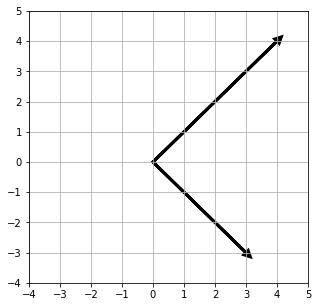

In [24]:
# plot the vectors
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-4,5)
plt.ylim(-4,5)

for vect in [r, h]:
  plt.arrow(0,0, vect[0], vect[1],
            head_width=.2,
            head_length=.2,
            linewidth=3)
plt.show()

In [25]:
r = np.array(r)
h = np.array(h)
np.dot(r,h)

# the vectors (r & h) are orthogonal

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [26]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a,b)
# No, vectors a & b are not orthogonal. 
# The dot product of these vectors is not equal to 0.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [29]:
c = [2, -15, 6, 20]

In [27]:
# ||c||^2
(2**2) + (-15**2) + (6**2) + (20**2)

215

In [61]:
np.matmul(c, c)

665

In [62]:
c = np.array([2, -15, 6, 20])

pd.DataFrame(c)
t = pd.DataFrame(c.T)

In [67]:
t = np.array(t)
t

array([[  2],
       [-15],
       [  6],
       [ 20]])

In [68]:
np.matmul(c, t)

array([665])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of 

---

scalars and unit vectors:



\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

*Your* text here

In [31]:
# find the norm of d
d = np.array([7, 12])
norm_d = np.linalg.norm(d)
print('{:.4f}'.format(norm_d))

13.8924


In [32]:
# unit vector of d
d_hat = d/np.linalg.norm(d)
print(d_hat)

[0.50387103 0.8637789 ]


In [34]:
# linear combination of d's scalar and unit vector
norm_d * d_hat

array([ 7., 12.])

In [35]:
# find the norm of e
e = np.array([2, 11, -8])
norm_e = np.linalg.norm(e)
print('{:.4f}'.format(norm_e))

13.7477


In [36]:
# unit vector of e
e_hat = e/np.linalg.norm(e)
print(e_hat)

[ 0.14547859  0.80013226 -0.58191437]


In [37]:
# linear combination
norm_e * e_hat

array([ 2., 11., -8.])

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [38]:
# f as an array
f = np.array([4, 12, 11, 9, 2])
f

array([ 4, 12, 11,  9,  2])

In [40]:
# norm
norm_f = np.linalg.norm(f)
print('{:.4f}'.format(norm_f))

19.1311


In [41]:
# unit vector
f_hat = f/np.linalg.norm(f)
print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [42]:
# linearly dependent vectors
vector_1 = [-1, 2]
vector_2 = np.multiply(vector_1, 2)
print(vector_1, '\n', vector_2)

[-1, 2] 
 [-2  4]


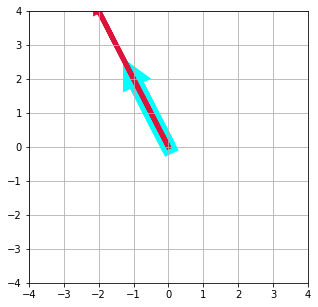

In [45]:
# plot the linearly dependent vectors
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-4, 4)
plt.ylim(-4,4)

for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=width,
            color=mycolor)

In [46]:
# linearly independent vectors
vector_1 = np.random.randint(low=-2, high=2, size=2)
vector_2 = np.random.randint(low=-2, high=2, size=2)
print(vector_1, '\n', vector_2)

[-2  0] 
 [1 1]


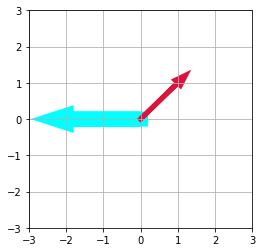

In [47]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

for myvect, mycolor, width in [(vector_1, 'cyan', 15), (vector_2, 'crimson', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            linewidth=width,
            color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
# a[1 2] + b[4 8]
# The span of g and h are all possible linear combinations 
# Linear combinations = all possible values of a and b

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
# a[1 2 3] + b[-1 0 7] + c[4 8 2]

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



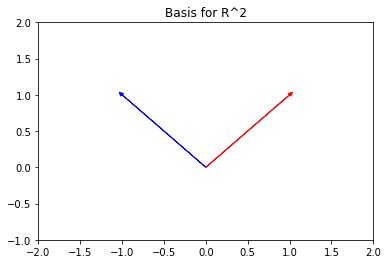

In [49]:
# basis vectors
vector_1 = [-1, 1]
vector_2 = [1, 1]

plt.arrow(0,0, vector_1[0], vector_1[1], head_width=.05, head_length=.05, color = 'blue')
plt.arrow(0,0, vector_2[0], vector_2[1], head_width=.05, head_length=.05, color = 'red')
plt.xlim(-2,2)
plt.ylim(-1,2)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [50]:
# the rank of P is 3
P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?


Rank tells us the number of linearly independent vectors in the row space of a matrix and by extension the space of R^n that is spanned by the vectors of the matrix.


# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [51]:
v = np.array([1,3])
w = np.array([-1, 2])

In [52]:
# dot product
w_dot_v = np.dot(v,w)
v_dot_v = np.dot(v, v)

In [53]:
# projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


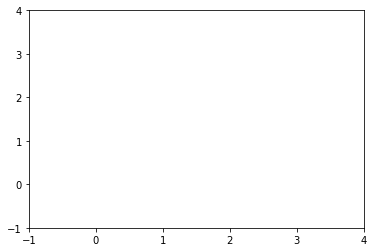

In [55]:
# plot
plt.xlim(-1,4)
plt.ylim(-1,4)
axes = plt.gca()

In [56]:
# get values for L3
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


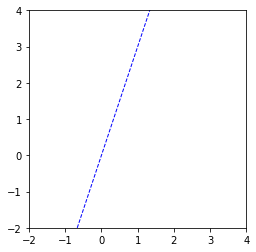

In [60]:
plt.xlim(-2,4)
plt.ylim(-2,4)

axes = plt.gca()
plt.axes().set_aspect('equal')

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

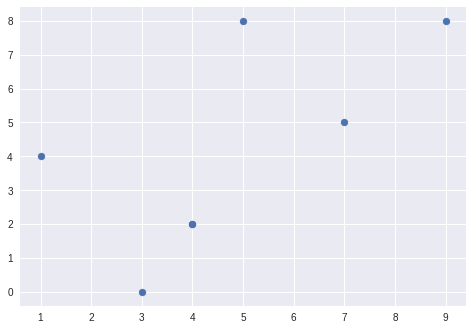

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()